# Bellabeat_Analysis

#### Google’s Data Analytics Certificate Capstone

#### 19/02/2022

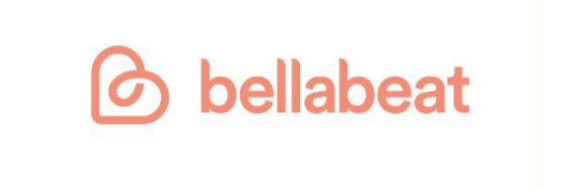

## Introduction

Welcome to the Bellabeat data analysis case study! ! In this case study,
I will analyze consumer data and provide insights to help guide the
company’s marketing strategy.Bellabeat is a high-tech manufacturer of
health-focused products for women.The co-founder and chief creative
officer, Urška Sršen, believes analyzing smart device data can be
helpful in discovering trends in consumer usage.By analyzing daily
activity we will describe the trends as well as provide a high-level
recommendation for marketing Bellabeat’s products.

## Loading packages in R

``` r
library(tidyverse)
library(plyr)
library(dplyr)
library(lubridate)
library(data.table)
library(ggplot2)
library(ggpubr)
```

### Load data

``` r
## daily activity table
daily_activity <-  read.csv("dailyActivity_merged.csv")
head(daily_activity)
```

    ##           Id ActivityDate TotalSteps TotalDistance TrackerDistance
    ## 1 1503960366    4/12/2016      13162          8.50            8.50
    ## 2 1503960366    4/13/2016      10735          6.97            6.97
    ## 3 1503960366    4/14/2016      10460          6.74            6.74
    ## 4 1503960366    4/15/2016       9762          6.28            6.28
    ## 5 1503960366    4/16/2016      12669          8.16            8.16
    ## 6 1503960366    4/17/2016       9705          6.48            6.48
    ##   LoggedActivitiesDistance VeryActiveDistance ModeratelyActiveDistance
    ## 1                        0               1.88                     0.55
    ## 2                        0               1.57                     0.69
    ## 3                        0               2.44                     0.40
    ## 4                        0               2.14                     1.26
    ## 5                        0               2.71                     0.41
    ## 6                        0               3.19                     0.78
    ##   LightActiveDistance SedentaryActiveDistance VeryActiveMinutes
    ## 1                6.06                       0                25
    ## 2                4.71                       0                21
    ## 3                3.91                       0                30
    ## 4                2.83                       0                29
    ## 5                5.04                       0                36
    ## 6                2.51                       0                38
    ##   FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes Calories
    ## 1                  13                  328              728     1985
    ## 2                  19                  217              776     1797
    ## 3                  11                  181             1218     1776
    ## 4                  34                  209              726     1745
    ## 5                  10                  221              773     1863
    ## 6                  20                  164              539     1728

``` r
## sleep day record
sleepday <-  read.csv("sleepDay_merged.csv")
head(sleepday)
```

    ##           Id              SleepDay TotalSleepRecords TotalMinutesAsleep
    ## 1 1503960366 4/12/2016 12:00:00 AM                 1                327
    ## 2 1503960366 4/13/2016 12:00:00 AM                 2                384
    ## 3 1503960366 4/15/2016 12:00:00 AM                 1                412
    ## 4 1503960366 4/16/2016 12:00:00 AM                 2                340
    ## 5 1503960366 4/17/2016 12:00:00 AM                 1                700
    ## 6 1503960366 4/19/2016 12:00:00 AM                 1                304
    ##   TotalTimeInBed
    ## 1            346
    ## 2            407
    ## 3            442
    ## 4            367
    ## 5            712
    ## 6            320

``` r
## Record of steps taken
Totalsteps <-  read.csv("dailySteps_merged.csv")
head(Totalsteps)
```

    ##           Id ActivityDay StepTotal
    ## 1 1503960366   4/12/2016     13162
    ## 2 1503960366   4/13/2016     10735
    ## 3 1503960366   4/14/2016     10460
    ## 4 1503960366   4/15/2016      9762
    ## 5 1503960366   4/16/2016     12669
    ## 6 1503960366   4/17/2016      9705

## Data Cleaning

``` r
# # Checking for missing values.
count(is.na(daily_activity)== TRUE)
```

    ##    x.Id x.ActivityDate x.TotalSteps x.TotalDistance x.TrackerDistance
    ## 1 FALSE          FALSE        FALSE           FALSE             FALSE
    ##   x.LoggedActivitiesDistance x.VeryActiveDistance x.ModeratelyActiveDistance
    ## 1                      FALSE                FALSE                      FALSE
    ##   x.LightActiveDistance x.SedentaryActiveDistance x.VeryActiveMinutes
    ## 1                 FALSE                     FALSE               FALSE
    ##   x.FairlyActiveMinutes x.LightlyActiveMinutes x.SedentaryMinutes x.Calories
    ## 1                 FALSE                  FALSE              FALSE      FALSE
    ##   freq
    ## 1  940

``` r
count(is.na(sleepday)==TRUE)
```

    ##    x.Id x.SleepDay x.TotalSleepRecords x.TotalMinutesAsleep x.TotalTimeInBed
    ## 1 FALSE      FALSE               FALSE                FALSE            FALSE
    ##   freq
    ## 1  413

``` r
count(is.na(Totalsteps)==TRUE)
```

    ##    x.Id x.ActivityDay x.StepTotal freq
    ## 1 FALSE         FALSE       FALSE  940

``` r
## Changing char to date format for ActivityDate
daily_activity$ActivityDate <- as.Date(daily_activity$ActivityDate, "%m/%d/%Y")
Totalsteps$ActivityDay <- as.Date(Totalsteps$ActivityDay, "%m/%d/%Y")
sleepday$SleepDay <- as.Date(sleepday$SleepDay, "%m/%d/%Y")

class(daily_activity$ActivityDate)
```

    ## [1] "Date"

``` r
class(sleepday$SleepDay)
```

    ## [1] "Date"

``` r
class(Totalsteps$ActivityDay)
```

    ## [1] "Date"

``` r
## Setting same col name for dates in all df
colnames(sleepday)[2] <- "ActivityDate"
colnames(Totalsteps)[2] <- "ActivityDate"
```

## Analysis

``` r
## Aggregate data in order to find the average Distance
dailyAct_summary <- aggregate(cbind(VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance)~ActivityDate,daily_activity,mean) 
colnames(dailyAct_summary)[2:4] <- c('avg_very_active_Dist', 'avg_moderate_active_Dist','avg_light_active_Dist')
dailyAct_summary$ActivityDate <- as.Date(dailyAct_summary$ActivityDate, "%m/%d/%Y")
head(dailyAct_summary)
```

    ##   ActivityDate avg_very_active_Dist avg_moderate_active_Dist
    ## 1   2016-04-12             1.826364                0.3460606
    ## 2   2016-04-13             1.326667                0.4200000
    ## 3   2016-04-14             1.509697                0.5096970
    ## 4   2016-04-15             1.055758                0.4039394
    ## 5   2016-04-16             1.993750                0.7087500
    ## 6   2016-04-17             1.145312                0.4975000
    ##   avg_light_active_Dist
    ## 1              3.410000
    ## 2              3.140909
    ## 3              3.568485
    ## 4              3.767273
    ## 5              3.450625
    ## 6              2.822188

``` r
## Add a column to note day
dailyAct_summary <- dailyAct_summary %>%
mutate(weekday = weekdays(ActivityDate))
```

``` r
## Filtering from sleepday & Totalsteps table to new table
log_summary <- aggregate(TotalMinutesAsleep~ActivityDate,sleepday,mean)
log_summary1 <- aggregate(StepTotal~ActivityDate,Totalsteps,mean)
## Merging sleepday & Totalsteps table to  summary table
log_summary$StepTotal  <-  log_summary1$StepTotal[match(log_summary$ActivityDate,log_summary1$ActivityDate)]

dailyAct_summary$StepTotal  <-  log_summary$StepTotal[match(dailyAct_summary$ActivityDate,log_summary$ActivityDate)]
dailyAct_summary$TotalMinutesAsleep  <-  log_summary$TotalMinutesAsleep[match(dailyAct_summary$ActivityDate,log_summary$ActivityDate)]

Summary <- aggregate(cbind(avg_very_active_Dist,avg_moderate_active_Dist,avg_light_active_Dist,StepTotal,TotalMinutesAsleep)~weekday,dailyAct_summary,mean) 
colnames(Summary)[2:6] <- c('Avg_VeryActiveDist','Avg_ModerateActiveDist','Avg_LightActiveDist','Avg_Steps','Avg_MinAsleep')
head(Summary)
```

    ##    weekday Avg_VeryActiveDist Avg_ModerateActiveDist Avg_LightActiveDist
    ## 1   Friday           1.320292              0.4839967            3.485778
    ## 2   Monday           1.530398              0.5877758            3.368345
    ## 3 Saturday           1.510018              0.6775388            3.606981
    ## 4   Sunday           1.486788              0.6234670            2.893539
    ## 5 Thursday           1.322030              0.4809653            3.198694
    ## 6  Tuesday           1.603856              0.6036120            3.471348
    ##   Avg_Steps Avg_MinAsleep
    ## 1  7448.602      404.5817
    ## 2  7782.003      418.7897
    ## 3  8131.006      420.2167
    ## 4  6937.183      454.7652
    ## 5  7158.832      406.4337
    ## 6  8125.930      404.9394

## Data Visualization with ggplot

### Checking the average sleeping time on different days

``` r
ggplot(data=Summary, aes(x=weekday, y=Avg_MinAsleep)) + geom_bar(stat = "identity")+ labs(title="Average sleep per day" ,y='Average sleep per day', x ='Days')
```

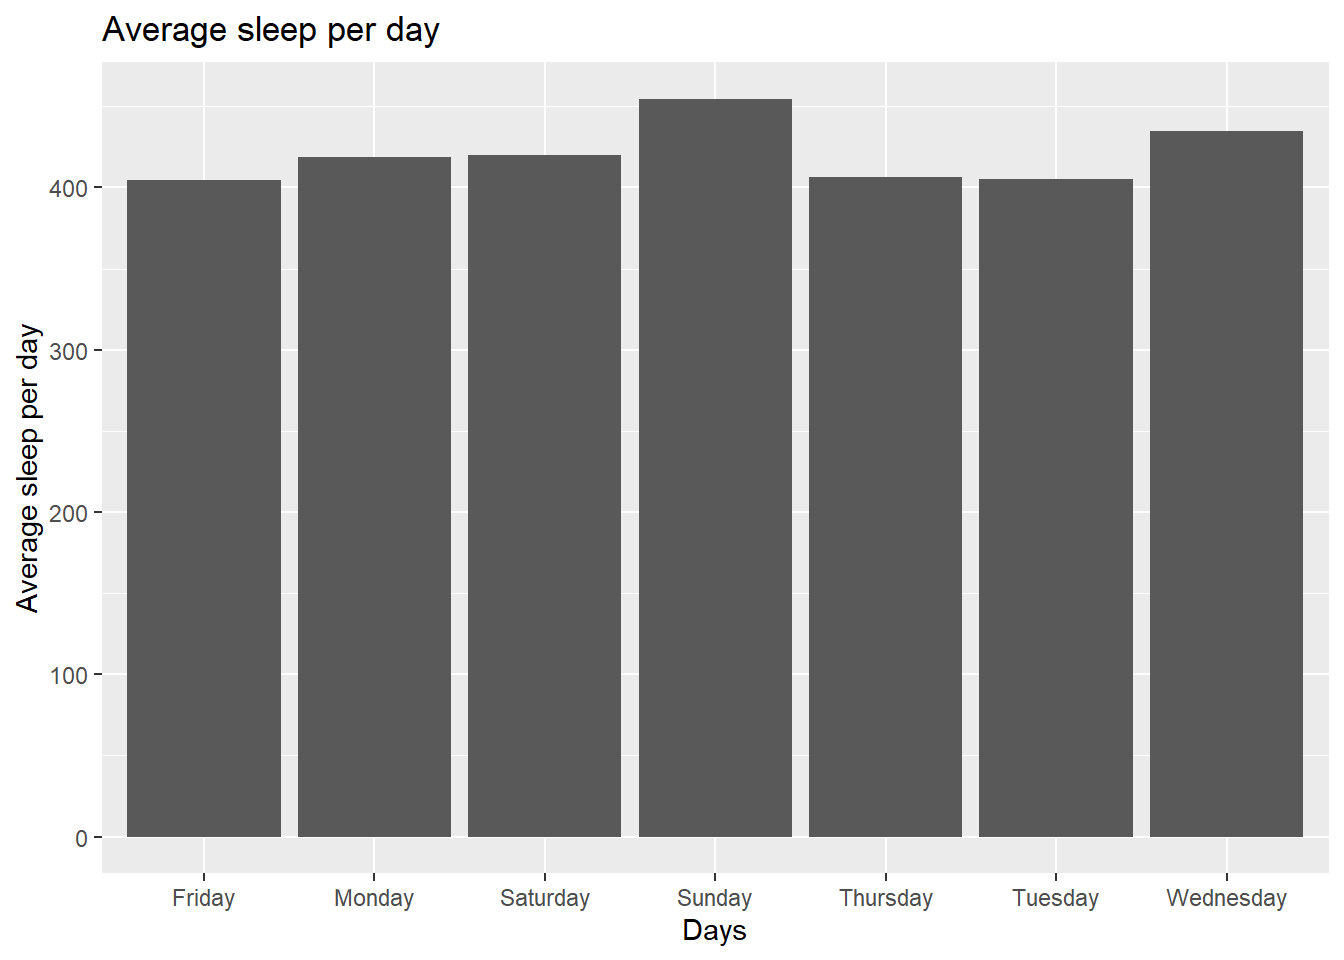

``` r
ggplot(data = dailyAct_summary, aes(x = ActivityDate, y = TotalMinutesAsleep)) + geom_line() + facet_wrap(facets = vars(weekday)) +  labs(title= 'Average Steelping Time per day',x='Date', y ='Average_MInutes Asleep')
```

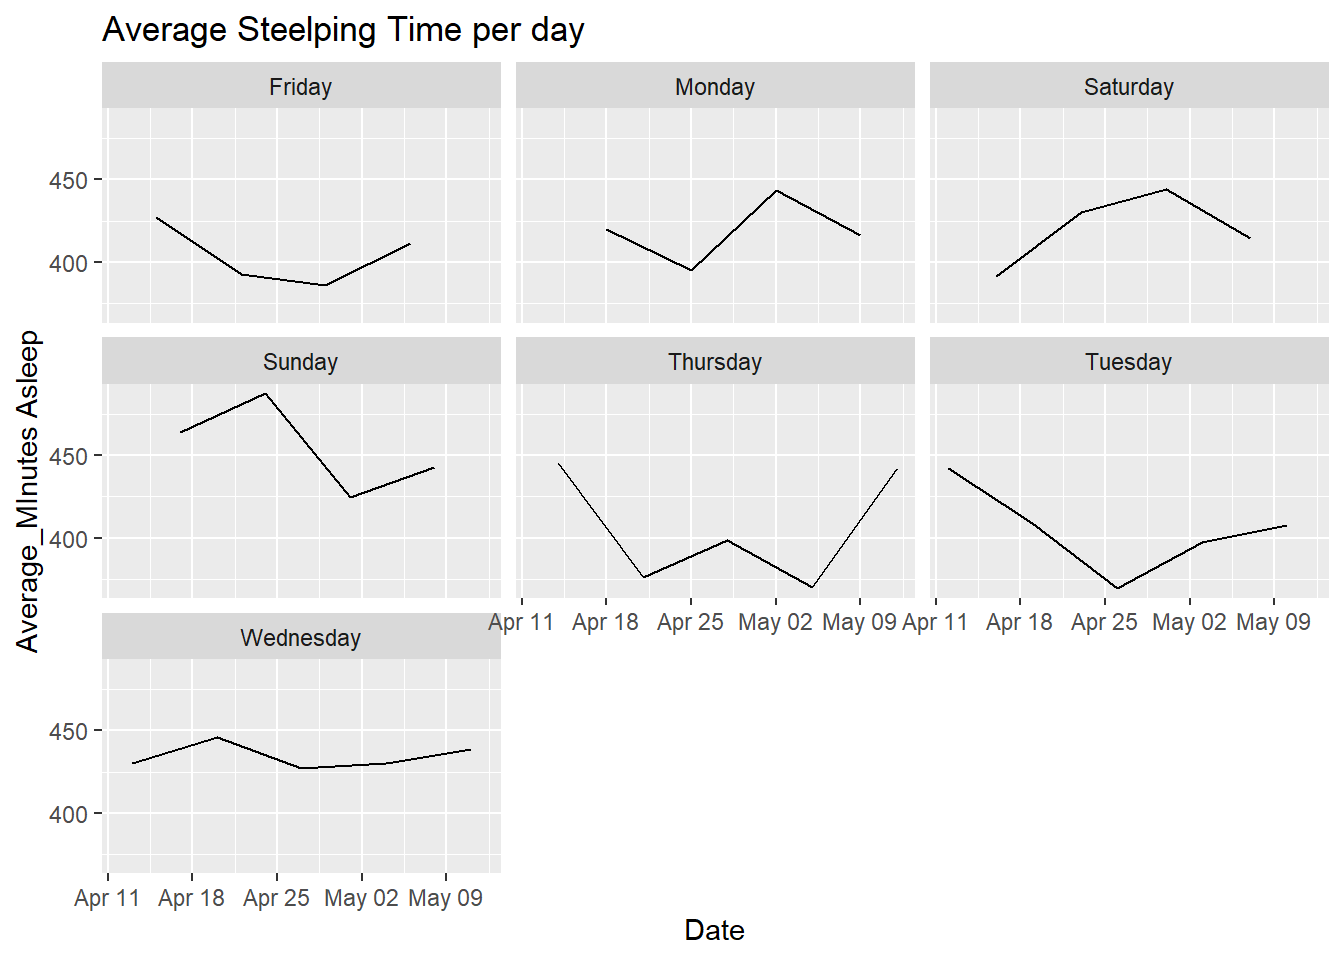

### Checking average steps walked on each day

``` r
ggplot(data = dailyAct_summary, aes(x = ActivityDate, y = StepTotal)) + geom_line() + facet_wrap(facets = vars(weekday)) +  labs(title= 'Average steps per day',x ='Date', y ='Average_steps')
```

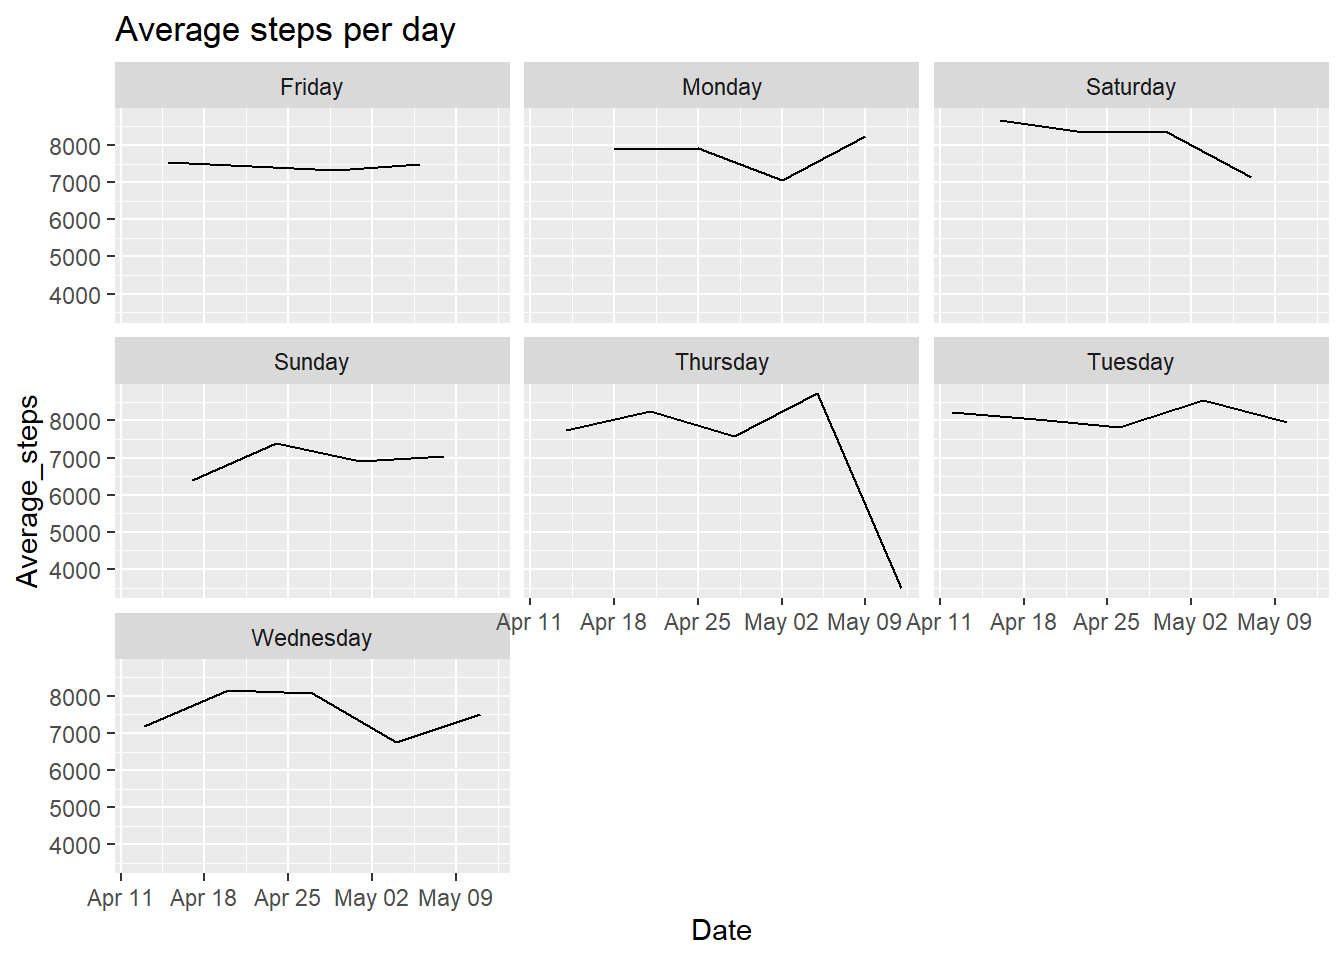

``` r
ggplot(data=dailyAct_summary, aes(x=ActivityDate, y=StepTotal,fill=weekday)) + geom_bar(stat = "identity")
```

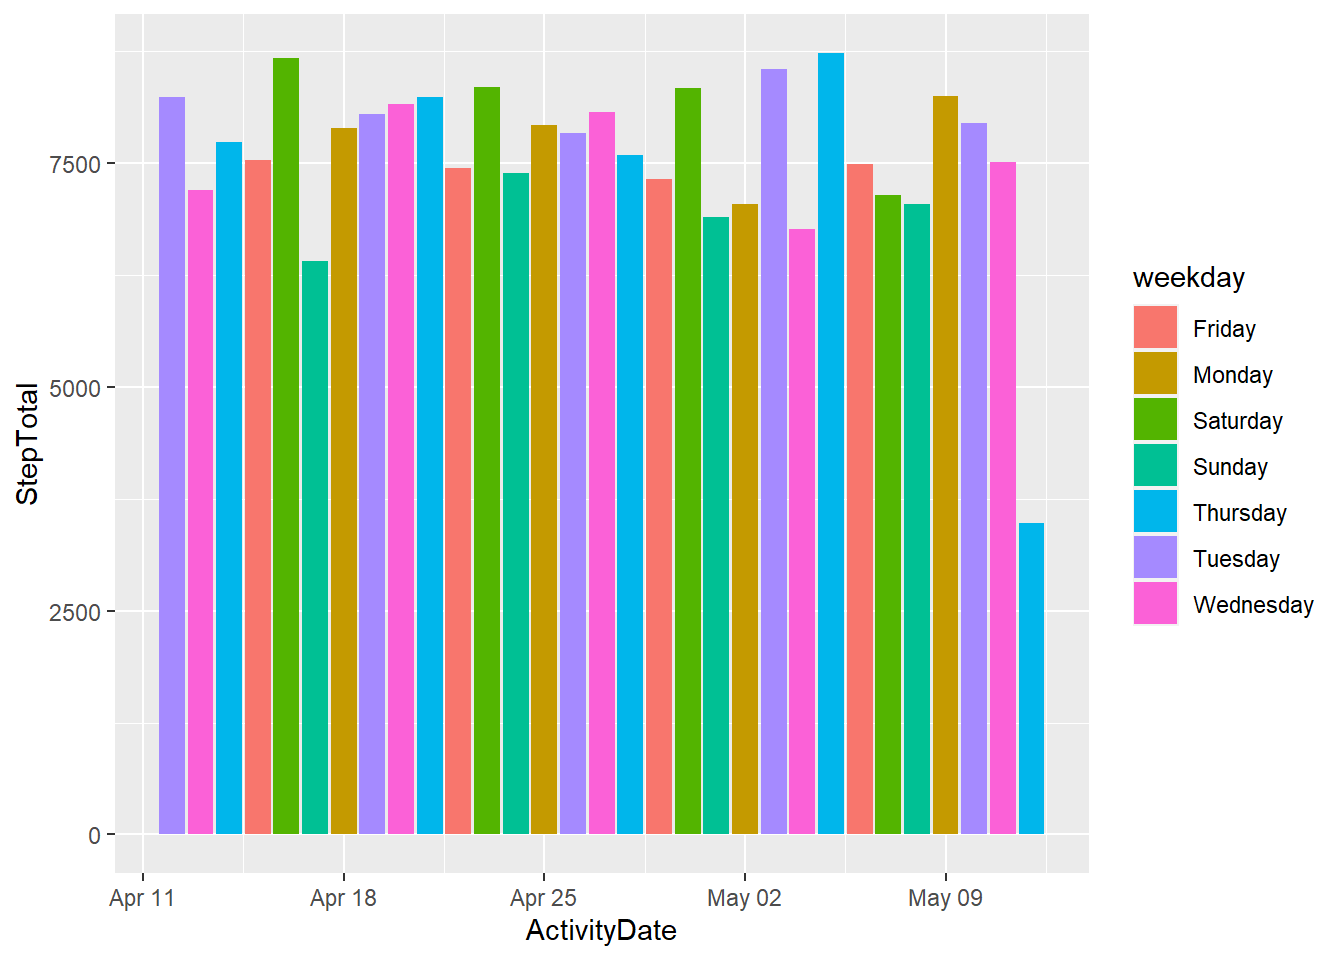

## Find correlation between steps taken and sleep time

#### Correlation formula

In the formula below,

x and y are two vectors of length n mx and my corresponds to the means
of x and y, respectively. \#\#\#\# Pearson correlation formula

r=∑(x−mx)(y−my)/√∑(x−mx)^2\*∑(y−my)^2

mx and my are the means of x and y variables.

The p-value (significance level) of the correlation can be determined :

1.  by using the correlation coefficient table for the degrees of
    freedom : df=n−2, where n is the number of observation in x and y
    variables.

2.  or by calculating the t value as follow:

t=r/√1−r^2\*√n−2

``` r
ggscatter(dailyAct_summary, x = "StepTotal", y = "TotalMinutesAsleep", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson")
```

    ## `geom_smooth()` using formula 'y ~ x'

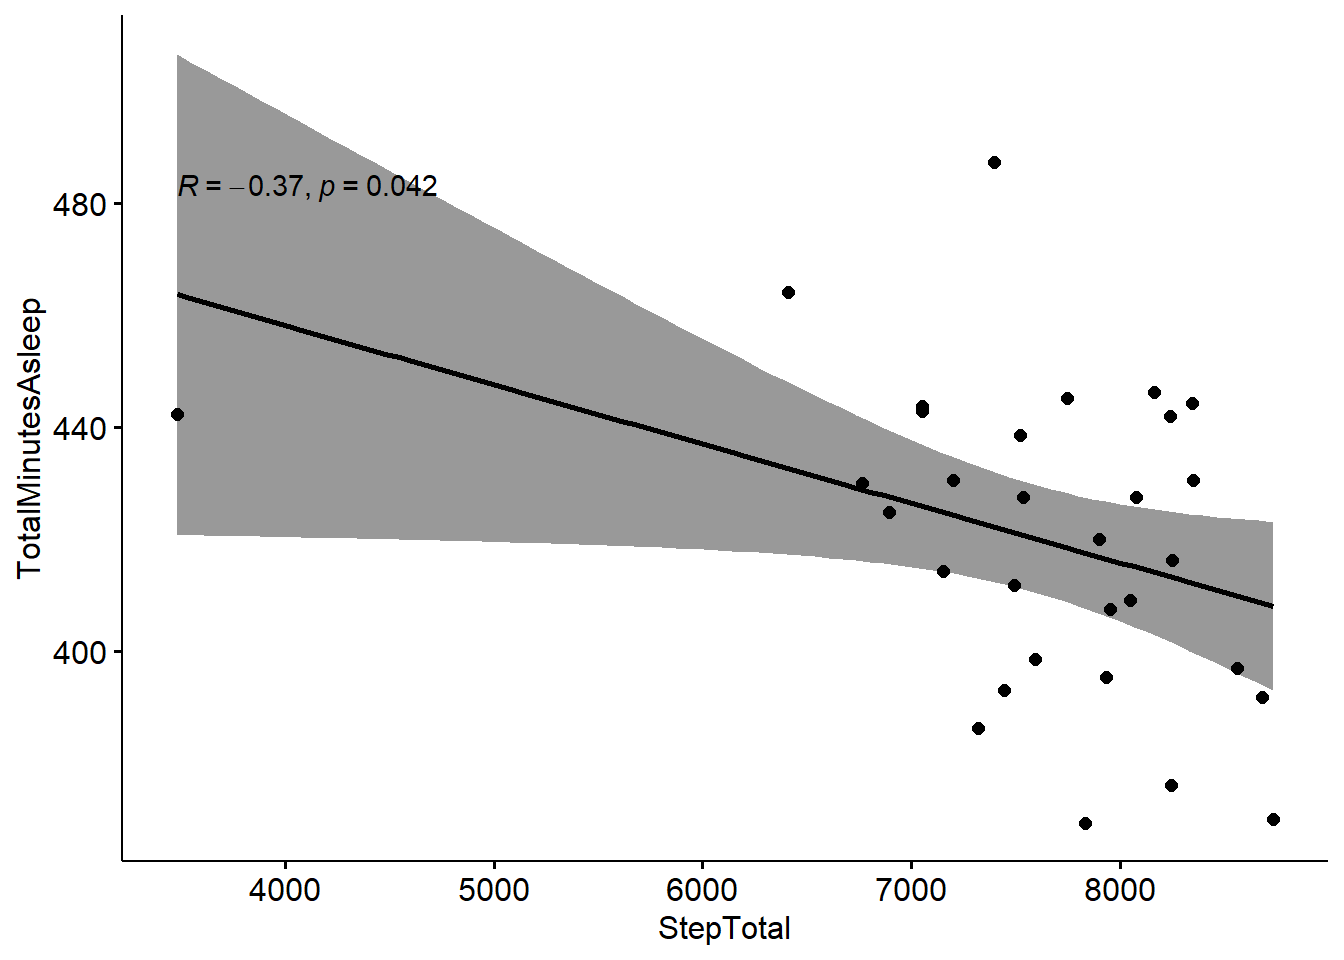

## Conclusion

Taking more steps during the day may be related to better sleep at
night, according to an encouraging new study of lifestyle and sleep
patterns. The study, which delved into the links between walking and
snoozing, suggests that being active can influence how well we sleep,
whether we actually exercise or not.

For general fitness, most adults should aim for 10,000 steps per day.
This figure may rise or fall depending on a person’s age, current
fitness level, and health goals.But from the data people failed to reach
the target ,we need to give recommendation to each individual, If a
person wishes to use walking as a way to improve their strength,
flexibility, or stamina, they may also benefit from more intense forms
of walking.

## Reference

Möbius. FitBit Fitness Tracker Data.Kaggle.[FitBit Fitness Tracker
Data](https://www.kaggle.com/arashnic/fitbit)

The New York Times:How Walking Might Affect Our Sleep by Gretchen
Reynolds.[NewYorkTimes](https://www.nytimes.com/2019/10/30/well/move/how-walking-might-affect-our-sleep.html#:~:text=Taking%20more%20steps%20during%20the,we%20actually%20exercise%20or%20not.)

MedicalNewsToday:How many steps should people take per day? , Written by
Jennifer Huizen
[MedicalNewsToday](https://www.medicalnewstoday.com/articles/how-many-steps-should-you-take-a-day)